# Projeto Ciência de Dados - Previsão de Vendas

- Nosso objetivo é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Planejamento Projeto de Ciência de Dados

- Passo 1: Entendimento do Objetivo
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [4]:
import pandas as pd

table = pd.read_csv("advertising.csv")
display(table)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
display(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

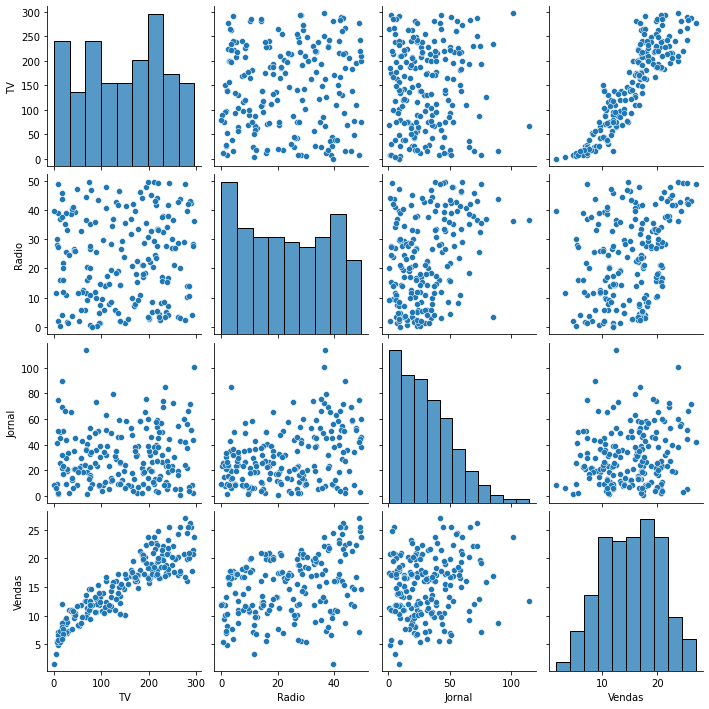

<function matplotlib.pyplot.show(close=None, block=None)>

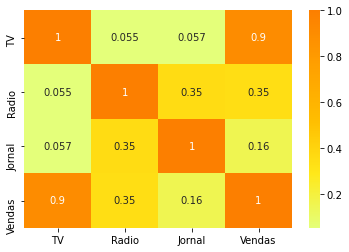

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(table)
plt.show()

sns.heatmap(table.corr(), cmap="Wistia", annot=True)
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [18]:
from sklearn.model_selection import train_test_split

x = table.drop("Vendas", axis=1)
y = table["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression()
linear.fit(x_treino, y_treino)

randomForest = RandomForestRegressor()
randomForest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

In [40]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomForest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear)
mse_linear = metrics.mean_squared_error(y_teste, teste_linear)

print("Regressão Linear")
print(f"\tR²: {r2_linear}")
print(f"\tMSE: {mse_linear}")
      
r2_random = metrics.r2_score(y_teste, teste_random)
mse_random = metrics.mean_squared_error(y_teste, teste_random)
      
print("Random Forest")
print(f"\tR²: {r2_random}")
print(f"\tMSE: {mse_random}")


Regressão Linear
	R²: 0.8857168249864821
	MSE: 3.3679708809183775
Random Forest
	R²: 0.9295631548944024
	MSE: 2.075802000000002


#### Visualização Gráfica das Previsões

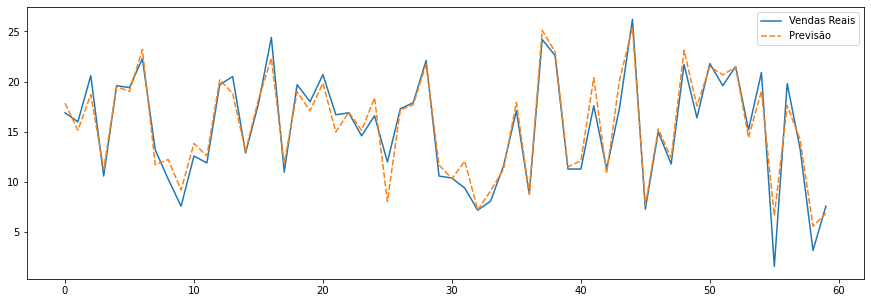

,Vendas Reais,Previsão
0,16.9,17.859
1,16.0,15.169
2,20.6,18.708
3,10.6,11.269
4,19.6,19.500
5,19.4,19.020
6,22.3,23.198
7,13.2,11.729
8,10.3,12.242
9,7.6,9.205


In [43]:
table_comp = pd.DataFrame()
table_comp["Vendas Reais"] = y_teste
table_comp["Previsão"] = teste_random
table_comp = table_comp.reset_index(drop=True)

plt.figure(figsize=(15,5))
sns.lineplot(data=table_comp)
plt.show()

display(table_comp)

#### Qual a importância de cada variável para as vendas?

    TV    |   Radio   |   Jornal
[0.83647797 0.14853876 0.01498327]


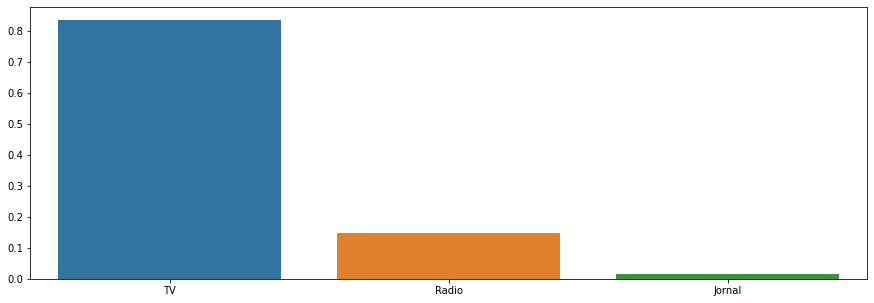

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x=x_treino.columns, y=randomForest.feature_importances_)

print("    TV    |   Radio   |   Jornal")
print(randomForest.feature_importances_)

#### Será que estamos investindo certo?

In [29]:
print("Valor investido")
print(table[["Radio","Jornal"]].sum())

Valor investido
Radio     4652.8
Jornal    6110.8
dtype: float64
